### This is the script that finds the genes associated with drugs that have side effects of Hyperglycaemia or Hypoglycaemia for the Non-Frequency Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
path_to_file = "/Users/aditgupta/Google Drive/Research/T2D/Summer_2018/meddra_all_se.tsv.gz"
#path to file that is being analyzed

In [3]:
df = pd.read_csv(path_to_file,delimiter="\t", header=None)
df.rename(columns={0:'ID'}, inplace=True)
# creates a dataframe from the tsv file by converting it to a csv file and then showing the .read_csv function that the delimiter is a tab (''\t')
#renames the first column of the dataframe [index: 0] to 'ID'

In [4]:
df3 = df.loc[df[5].isin(["Hyperglycaemia", "Hypoglycaemia", "Hypotension", "Hypertension"])]
df3.head()
#df3 searches the entire dataframe(df) for all cases in index=9 where one of these eight scenarios are present: blood pressure inc/dec, weight inc/dec, blood glucose inc/dec, hyper/hypo - cholesterolaemia

,ID,1,2,3,4,5
67,CID100000085,CID000010917,C0020538,LLT,C0020538,Hypertension
68,CID100000085,CID000010917,C0020538,PT,C0020538,Hypertension
69,CID100000085,CID000010917,C0020649,LLT,C0020649,Hypotension
70,CID100000085,CID000010917,C0020649,PT,C0020649,Hypotension
196,CID100000137,CID000000137,C0020649,LLT,C0020649,Hypotension


In [5]:
df4 = df3.loc[df[3].isin(["PT"])]
df4.head()
#displays a new dataframe with only values of 'PT' in index/column 7. This is because often each value has several LLT and are often duplicates, but each sample has only one PT value

,ID,1,2,3,4,5
68,CID100000085,CID000010917,C0020538,PT,C0020538,Hypertension
70,CID100000085,CID000010917,C0020649,PT,C0020649,Hypotension
197,CID100000137,CID000000137,C0020649,PT,C0020649,Hypotension
561,CID100000158,CID005280360,C0020538,PT,C0020538,Hypertension
563,CID100000158,CID005280360,C0020649,PT,C0020649,Hypotension


In [6]:
path_to_file = "/Users/aditgupta/Google Drive/Research/T2D/Summer_2018/drug_names.tsv" #this is the path to the file for all the drug names and corresponding ID's
df5 = pd.read_csv(path_to_file,delimiter="\t", header=None) #reads file, converts to csv, and explains to fucntio that the delimeter are tabs
df5.rename(columns={0:'ID'}, inplace=True) #renames index zero to 'ID'
df5.rename(columns={1:'drug_name'}, inplace=True) #renames index one to drug name
#OVERALL: df5 contains the drug name based on the 'CID' ID 

In [7]:
df5.head(10)

,ID,drug_name
0,CID100000085,carnitine
1,CID100000119,gamma-aminobutyric
2,CID100000137,5-aminolevulinic
3,CID100000143,leucovorin
4,CID100000146,5-methyltetrahydrofolate
5,CID100000158,PGE2
6,CID100000159,prostacyclin
7,CID100000160,prostaglandin
8,CID100000175,acetate
9,CID100000187,acetylcholine


In [8]:
df5.loc[df5["drug_name"].isin(["repaglinide"])] #the drug, repaglinide, which targets the PPARG gene (which variants are associated with T2D(Majithia et al PNAS 2014)) is present in the database.
#However its side effects aren't one of the four traits linked to type 2 diabetes, so the drug and samples don't get included in the final sample

,ID,drug_name
561,CID100004547,repaglinide


In [9]:
df.loc[df['ID'].isin(["CID100005470"])] #testing to see why the drug, tibolone, and its target gene ESR1 aren't present in the frequency sample

,ID,1,2,3,4,5
170385,CID100005470,CID000021844,C0003862,LLT,C0003862,Arthralgia
170386,CID100005470,CID000021844,C0003862,PT,C0003862,Arthralgia
170387,CID100005470,CID000021844,C0003862,PT,C0948594,Musculoskeletal discomfort
170388,CID100005470,CID000021844,C0006145,LLT,C0006145,Breast disorder
170389,CID100005470,CID000021844,C0006145,PT,C0006145,Breast disorder
170390,CID100005470,CID000021844,C0006852,LLT,C0006852,Vaginal moniliasis
170391,CID100005470,CID000021844,C0006852,PT,C0700345,Vulvovaginal candidiasis
170392,CID100005470,CID000021844,C0006852,PT,C1609512,Vulvovaginal mycotic infection
170393,CID100005470,CID000021844,C0007868,LLT,C0007868,Cervical dysplasia
170394,CID100005470,CID000021844,C0007868,PT,C0007868,Cervical dysplasia


In [10]:
df6 = pd.merge(df4, df5, on='ID', how='outer') #merges the fourth and fifth drug name based on the 'ID'
df6.rename(columns={3:'PT'}, inplace=True) #renames the index 7 to 'PT'
df6.head() #shows first five values of df6

,ID,1,2,PT,4,5,drug_name
0,CID100000085,CID000010917,C0020538,PT,C0020538,Hypertension,carnitine
1,CID100000085,CID000010917,C0020649,PT,C0020649,Hypotension,carnitine
2,CID100000137,CID000000137,C0020649,PT,C0020649,Hypotension,5-aminolevulinic
3,CID100000158,CID005280360,C0020538,PT,C0020538,Hypertension,PGE2
4,CID100000158,CID005280360,C0020649,PT,C0020649,Hypotension,PGE2


In [11]:
# This contains all attributes
df7 = df6[df6.PT.str.contains("NaN") == False] #removes all values from dataframe where the value in the index 'PT' is NaN
df7.head(15)

,ID,1,2,PT,4,5,drug_name
0,CID100000085,CID000010917,C0020538,PT,C0020538,Hypertension,carnitine
1,CID100000085,CID000010917,C0020649,PT,C0020649,Hypotension,carnitine
2,CID100000137,CID000000137,C0020649,PT,C0020649,Hypotension,5-aminolevulinic
3,CID100000158,CID005280360,C0020538,PT,C0020538,Hypertension,PGE2
4,CID100000158,CID005280360,C0020649,PT,C0020649,Hypotension,PGE2
5,CID100000159,CID005282411,C0020649,PT,C0020649,Hypotension,prostacyclin
6,CID100000160,CID005280363,C0020649,PT,C0020649,Hypotension,prostaglandin
7,CID100000187,CID000000187,C0020649,PT,C0020649,Hypotension,acetylcholine
8,CID100000191,CID000060961,C0020538,PT,C0020538,Hypertension,adenosine
9,CID100000191,CID000060961,C0020649,PT,C0020649,Hypotension,adenosine


In [12]:
df7.loc[df7['drug_name'].isin(["repaglinide"])].head() #testing to find all cases with the drug "alprazolam"

,ID,1,2,PT,4,5,drug_name
820,CID100004547,CID000065981,C0020456,PT,C0020456,Hyperglycaemia,repaglinide
821,CID100004547,CID000065981,C0020538,PT,C0020538,Hypertension,repaglinide
822,CID100004547,CID000065981,C0020615,PT,C0020615,Hypoglycaemia,repaglinide


In [13]:
df7.loc[df7[5].isin(["Hypoglycaemia"])].head() #all cases where Hypoglycaemia decreased in patients as side effect

,ID,1,2,PT,4,5,drug_name
13,CID100000214,CID005280723,C0020615,PT,C0020615,Hypoglycaemia,PGE1
16,CID100000214,CID006433212,C0020615,PT,C0020615,Hypoglycaemia,PGE1
22,CID100000444,CID000000444,C0020615,PT,C0020615,Hypoglycaemia,bupropion
43,CID100000838,CID000005815,C0020615,PT,C0020615,Hypoglycaemia,epinephrine
45,CID100000853,CID000005819,C0020615,PT,C0020615,Hypoglycaemia,thyroxine


In [14]:
import xml.etree.ElementTree as ET
import lxml.html
import numpy as np
import pandas as pd
#importing libraries that parse the xml file with detailed drug information 

In [15]:
path_to_file = '/Users/aditgupta/Google Drive/Research/T2D/Summer_2018/drugbank_full_database.xml' #file location of the drugbank database

In [16]:
tree = ET.parse(path_to_file) # function that parses the xml file from drugbank

In [17]:
def get_id_and_name_from_target(target):
    id = target.find("{http://www.drugbank.ca}id").text
    name = target.find("{http://www.drugbank.ca}name").text
    gene = target.find("*{http://www.drugbank.ca}gene-name")
    if gene is None:
        gene_found = None
    else:
        gene_found= gene.text
    return id, name, gene_found
#function that returns the target id, target name, and gene name of a particular sample

In [18]:
all_drugs = tree.findall("{http://www.drugbank.ca}drug")

In [19]:
new_results = []
total_found = 0
for drug in all_drugs:
    drug_name = drug.find("{http://www.drugbank.ca}name").text
    drug_id = drug.find("{http://www.drugbank.ca}drugbank-id[@primary]").text
    element_containing_all_targets = drug.find("{http://www.drugbank.ca}targets")
    list_of_targets = element_containing_all_targets.findall("{http://www.drugbank.ca}target")
    for target in list_of_targets:
        target_id, target_name, target_gene = get_id_and_name_from_target(target)
        new_results.append([drug_name, drug_id, target_id, target_name, target_gene])
    total_found += 1
#creates an array and list that contains the drug name, drug id, target id, target name, and target gene as extracted from drug bank

In [20]:
drug = all_drugs[0]
element_containing_all_targets = drug.find("{http://www.drugbank.ca}targets")
list_of_targets = element_containing_all_targets.findall("{http://www.drugbank.ca}target")
target = list_of_targets[0]

In [21]:
%%bash
head -n 2500 /users/aditgupta/Google\ Drive/Research/T2D/Summer_2018/drugbank_full_database.xml | tail -n 10 

        <identifier>M17262</identifier>
      </external-identifier>
      <external-identifier>
        <resource>GenBank Protein Database</resource>
        <identifier>339641</identifier>
      </external-identifier>
      <external-identifier>
        <resource>Guide to Pharmacology</resource>
        <identifier>2362</identifier>
      </external-identifier>


In [22]:
df = pd.DataFrame(new_results) #df contains the results from the parsing of the xml file from drugbank

In [23]:
df.columns = ["drug_name", "drug_id", "target_id", "target_name", "target_gene"] #renaming the columns of the dataframe

In [24]:
df.head() 

,drug_name,drug_id,target_id,target_name,target_gene
0,Lepirudin,DB00001,BE0000048,Prothrombin,F2
1,Cetuximab,DB00002,BE0000767,Epidermal growth factor receptor,EGFR
2,Cetuximab,DB00002,BE0000901,Low affinity immunoglobulin gamma Fc region re...,FCGR3B
3,Cetuximab,DB00002,BE0002093,Complement C1r subcomponent,C1R
4,Cetuximab,DB00002,BE0002094,Complement C1q subcomponent subunit A,C1QA


In [25]:
df["drug_name"] = df["drug_name"].str.lower() #all drug names in the dataframe are made lower case for simplicity 

In [26]:
indexed_df = df.set_index("drug_name") #new dataframe where the index is drug_name

In [27]:
indexed_df.head()

,drug_id,target_id,target_name,target_gene
drug_name,,,,
lepirudin,DB00001,BE0000048,Prothrombin,F2
cetuximab,DB00002,BE0000767,Epidermal growth factor receptor,EGFR
cetuximab,DB00002,BE0000901,Low affinity immunoglobulin gamma Fc region re...,FCGR3B
cetuximab,DB00002,BE0002093,Complement C1r subcomponent,C1R
cetuximab,DB00002,BE0002094,Complement C1q subcomponent subunit A,C1QA


In [28]:
indexed_df.ix[df7["drug_name"]].head(10)

/Users/aditgupta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/Users/aditgupta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


,drug_id,target_id,target_name,target_gene
drug_name,,,,
carnitine,NaN,NaN,NaN,NaN
carnitine,NaN,NaN,NaN,NaN
5-aminolevulinic,NaN,NaN,NaN,NaN
PGE2,NaN,NaN,NaN,NaN
PGE2,NaN,NaN,NaN,NaN
prostacyclin,NaN,NaN,NaN,NaN
prostaglandin,NaN,NaN,NaN,NaN
acetylcholine,DB03128,BE0000426,Acetylcholinesterase,ACHE
acetylcholine,DB03128,BE0000092,Muscarinic acetylcholine receptor M1,CHRM1


In [29]:
target_lookup_table = indexed_df.ix[df7["drug_name"]].dropna().groupby("drug_name")[["target_id", "target_name", "target_gene"]].agg(list) #a table/dataframe to find the target name, id, and gene based on the drug 

/Users/aditgupta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/Users/aditgupta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


In [30]:
target_lookup_table.head() #a table/dataframe to find the target name, id, and gene based on the drug 

,target_id,target_name,target_gene
drug_name,,,
abacavir,"[BE0004136, BE0009142, BE0004136, BE0009142, B...","[Reverse transcriptase/RNaseH, HLA class I his...","[pol, HLA-B, pol, HLA-B, pol, HLA-B]"
abiraterone,"[BE0000344, BE0000344]","[Steroid 17-alpha-hydroxylase/17,20 lyase, Ste...","[CYP17A1, CYP17A1]"
acamprosate,"[BE0004797, BE0004852, BE0001192, BE0004797, B...","[GABA-A receptor (anion channel), Glutamate (N...","[GABRA1, GRIN1, GRM5, GABRA1, GRIN1, GRM5, GAB..."
acebutolol,"[BE0000172, BE0000694]","[Beta-1 adrenergic receptor, Beta-2 adrenergic...","[ADRB1, ADRB2]"
acetaminophen,"[BE0000262, BE0000017, BE0002194, BE0001023, B...","[Prostaglandin G/H synthase 2, Prostaglandin G...","[PTGS2, PTGS1, FAAH, TRPV1, GSTP1, PTGS2, PTGS..."


In [31]:
df7 = df7.rename(columns={"DrugName":'drug_name'}, inplace=False) #renames the index "DrugName" from df7 to "drug_name"

In [32]:
df26 = df7["drug_name"].unique() #finding all drugs that are yield one of the four traits. 
len(df26) #length function shows that ther eare 257 unique drugs, but these have not been fully cleaned for data analysis use

888

In [33]:
df8 = pd.merge(df7, target_lookup_table, on='drug_name', how='outer') #merges the target_lookup_table with df7 to show all id's, drug names, frequencies, side effects, targets ids/names
df8.head()

,ID,1,2,PT,4,5,drug_name,target_id,target_name,target_gene
0,CID100000085,CID000010917,C0020538,PT,C0020538,Hypertension,carnitine,NaN,NaN,NaN
1,CID100000085,CID000010917,C0020649,PT,C0020649,Hypotension,carnitine,NaN,NaN,NaN
2,CID100000137,CID000000137,C0020649,PT,C0020649,Hypotension,5-aminolevulinic,NaN,NaN,NaN
3,CID100000158,CID005280360,C0020538,PT,C0020538,Hypertension,PGE2,NaN,NaN,NaN
4,CID100000158,CID005280360,C0020649,PT,C0020649,Hypotension,PGE2,NaN,NaN,NaN


In [34]:
df.loc[df["drug_name"].isin(["estradiol"])]
#finds important target information for the drug estradiol using df (from above)

,drug_name,drug_id,target_id,target_name,target_gene
3699,estradiol,DB00783,BE0000123,Estrogen receptor alpha,ESR1
3700,estradiol,DB00783,BE0000792,Estrogen receptor beta,ESR2
3701,estradiol,DB00783,BE0000956,Nuclear receptor subfamily 1 group I member 2,NR1I2
3702,estradiol,DB00783,BE0000849,Neuronal acetylcholine receptor subunit alpha-4,CHRNA4
3703,estradiol,DB00783,BE0003740,Nuclear receptor coactivator 2,NCOA2
3704,estradiol,DB00783,BE0003446,G-protein coupled estrogen receptor 1,GPER1
3705,estradiol,DB00783,BE0009014,ATP synthase subunit a,MT-ATP6
3706,estradiol,DB00783,BE0009015,Beclin-1,BECN1
3707,estradiol,DB00783,BE0000006,Estradiol 17-beta-dehydrogenase 2,HSD17B2
3708,estradiol,DB00783,BE0002088,Estrogen-related receptor gamma,ESRRG


In [35]:
df.loc[df["target_gene"].isin(["ESR1"])].head() #testing to see the drugs that target ESR1 using df (from above)

,drug_name,drug_id,target_id,target_name,target_gene
1618,diethylstilbestrol,DB00255,BE0000123,Estrogen receptor alpha,ESR1
1663,chlorotrianisene,DB00269,BE0000123,Estrogen receptor alpha,ESR1
1735,conjugated estrogens,DB00286,BE0000123,Estrogen receptor alpha,ESR1
1753,etonogestrel,DB00294,BE0000123,Estrogen receptor alpha,ESR1
1778,desogestrel,DB00304,BE0000123,Estrogen receptor alpha,ESR1


In [36]:
df8.loc[df8["drug_name"].isin(["carnitine"])]
#Finding all attribute infromation for the drug, carnitine. We can see that there are no approved/tested targets for carnitine in drugbank so far

,ID,1,2,PT,4,5,drug_name,target_id,target_name,target_gene
0,CID100000085,CID000010917,C0020538,PT,C0020538,Hypertension,carnitine,NaN,NaN,NaN
1,CID100000085,CID000010917,C0020649,PT,C0020649,Hypotension,carnitine,NaN,NaN,NaN


In [37]:
df.loc[df["target_name"].isin(["Sodium-dependent dopamine transporter"])].head() #this looks for the attributes related to the target, sodium-dependent dopamine transporter (gene: SLC6A3)

,drug_name,drug_id,target_id,target_name,target_gene
1299,amphetamine,DB00182,BE0000647,Sodium-dependent dopamine transporter,SLC6A3
1335,phentermine,DB00191,BE0000647,Sodium-dependent dopamine transporter,SLC6A3
1544,benzatropine,DB00245,BE0000647,Sodium-dependent dopamine transporter,SLC6A3
1734,venlafaxine,DB00285,BE0000647,Sodium-dependent dopamine transporter,SLC6A3
1741,atomoxetine,DB00289,BE0000647,Sodium-dependent dopamine transporter,SLC6A3


In [38]:
df.loc[df["drug_name"].isin(["rufinamide"])] #looks for target information for the drug rufinamide

,drug_name,drug_id,target_id,target_name,target_gene
12943,rufinamide,DB06201,BE0001192,Metabotropic glutamate receptor 5,GRM5
12944,rufinamide,DB06201,BE0001143,Sodium channel protein type 9 subunit alpha,SCN9A


In [39]:
#Find all drugs that have at most two targets and all targets that have at least two drugs targeting it
#df14 creates a dataframe that displays the number of targets of a given drug 
df11 = df['drug_name'].value_counts() 
df12 = df11.to_frame(name=None)
df13 = df12.reset_index()
df14 = df13.rename(columns={'drug_name':'number_of_targets'}, inplace=False)

In [40]:
df15 = df14.rename(columns={'index':'drug_name'}, inplace=False)
df15.head()
#df15 is a dataframe that displays the number of targets given a drug 

,drug_name,number_of_targets
0,fostamatinib,300
1,artenimol,192
2,copper,147
3,nadh,144
4,zinc,124


In [41]:
df15.loc[df15['drug_name'].isin(["tibolone"])] #finding the number of targets of tibolone for testing 

,drug_name,number_of_targets
6002,tibolone,1


In [42]:
#purpose of this cell is to find the number of drugs that target a specific target. Only targets that have more than two drugs targeting it are desired 
target_freq = df['target_id'].value_counts() #number of drugs that target a given target ID in a series
df17 = target_freq.to_frame(name=None)
df18 = df17.reset_index()
df19 = df18.rename(columns={'target_id':'target_freq'}, inplace=False)
df20 = df19.rename(columns={'index':'target_id'}, inplace=False)
df20.head(10)
#df20 is a datagrame that shows the total number of drugs that target a given target ID i

,target_id,target_freq
0,BE0001072,137
1,BE0000048,112
2,BE0000123,111
3,BE0000756,108
4,BE0000451,105
5,BE0000442,104
6,BE0004796,101
7,BE0000322,100
8,BE0001739,99
9,BE0000092,97


In [43]:
df20.loc[df20['target_id'].isin(["BE0000123"])] #shows the number of drugs that target BE0000123 (target id for Estrogen receptor alpha for ESR1 gene) for testing purposes

,target_id,target_freq
2,BE0000123,111


In [44]:
import matplotlib.pyplot as plt
hist_plot = df15['number_of_targets'].hist(bins=15,grid=False, figsize=(10,8))
hist_plot.set_xlabel('Number of Targets')
hist_plot.set_ylabel('Frequency (of Drugs)')
hist_plot.set_title('Histogram of the Number of Targets with respect to Frequency of Given Drugs')
hist_plot.set_xlim(0,300)
#This histogram shows a plot of the frequency of drugs and its respective target number
#Most drugs fall in the first bin which have at most 2 targets 

(0, 300)

In [45]:
df10 = df15[(df15['number_of_targets'])<3]  
df10.head()
#df10 is a dataframe that only contains drugs that have a maximum of two targets

,drug_name,number_of_targets
1508,1-chloro-6-(4-hydroxyphenyl)-2-naphthol,2
1509,chlormerodrin,2
1510,"interferon alfa-2a, recombinant",2
1511,tetrabutylammonium ion,2
1512,indigotindisulfonic acid,2


In [46]:
df10.loc[df10['drug_name'].isin(["repaglinide"])] #this drug *repaglinide targets PPARG, which has been shown to be associated with t2d. It has two targets
#but it isn't included in our sample of all unique drugs at the end because the side effect is not one of the four traits 

,drug_name,number_of_targets
2215,repaglinide,2


In [47]:
df10['drug_name'].unique #displays all unique genes that at most two targets. There are 5891 genes that fit this criteria

<bound method Series.unique of 1508              1-chloro-6-(4-hydroxyphenyl)-2-naphthol
1509                                        chlormerodrin
1510                      interferon alfa-2a, recombinant
1511                               tetrabutylammonium ion
1512                             indigotindisulfonic acid
1513                                             suprofen
1514                                           resiquimod
1515                  n-[1h-indol-3-yl-acetyl]valine acid
1516    n-methyl-n-[3-(6-phenyl[1,2,4]triazolo[4,3-b]p...
1517                                           hexamidine
1518                                            reglixane
1519                                  1,10-phenanthroline
1520                          medroxyprogesterone acetate
1521                                               at9283
1522                                            progabide
1523                                             trapidil
1524                                     

In [48]:
df21 = df20[(df20['target_freq'])>1]  #df21 is a dataframe that contains all targets that have at least two drugs targeting it
df21.head(15) #displays first 15 targets 


,target_id,target_freq
0,BE0001072,137
1,BE0000048,112
2,BE0000123,111
3,BE0000756,108
4,BE0000451,105
5,BE0000442,104
6,BE0004796,101
7,BE0000322,100
8,BE0001739,99
9,BE0000092,97


In [49]:
df21.loc[df21['target_id'].isin(["BE0000123"])] #shows the number of drugs that target BE0000123 (the target_id that encodes for the ESR1 gee)

,target_id,target_freq
2,BE0000123,111


(0, 140)

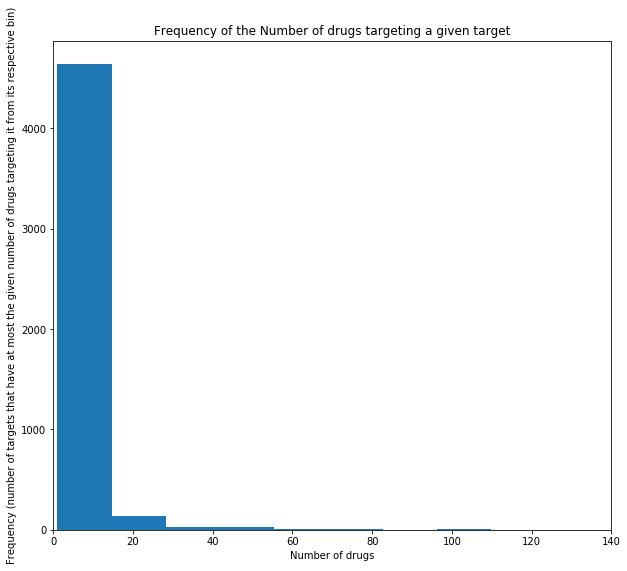

In [50]:
hist_plot_target = df20['target_freq'].hist(bins=10,grid=False, figsize=(10,9))
hist_plot_target.set_xlabel('Number of drugs')
hist_plot_target.set_ylabel('Frequency (number of targets that have at most the given number of drugs targeting it from its respective bin)')
hist_plot_target.set_title('Frequency of the Number of drugs targeting a given target')
hist_plot_target.set_xlim(0,140)
#creates a histogram that contains the target frequncies that have x (x-axis) number of drugs that target a given target
#y-axis is the number of targets that fit within the criteria. Most targets can be seen to have at most 10 drugs targeting it

In [51]:
df16 = pd.merge(df8, df10, on='drug_name', how='inner')
df16.head(15) #df16 is a dataframe that includes all drugs integrated with df10 and displays all target ids, names, genes, and the number of targets based on a gene 
#Only includes drugs that have a maximum of two targets
df16.head()

,ID,1,2,PT,4,5,drug_name,target_id,target_name,target_gene,number_of_targets
0,CID100000596,CID000006252,C0020456,PT,C0020456,Hyperglycaemia,cytarabine,"[BE0000113, BE0000113, BE0000113]","[DNA polymerase beta, DNA polymerase beta, DNA...","[POLB, POLB, POLB]",2
1,CID100000596,CID000006252,C0020538,PT,C0020538,Hypertension,cytarabine,"[BE0000113, BE0000113, BE0000113]","[DNA polymerase beta, DNA polymerase beta, DNA...","[POLB, POLB, POLB]",2
2,CID100000596,CID000006252,C0020649,PT,C0020649,Hypotension,cytarabine,"[BE0000113, BE0000113, BE0000113]","[DNA polymerase beta, DNA polymerase beta, DNA...","[POLB, POLB, POLB]",2
3,CID100000813,CID000000813,C0020649,PT,C0020649,Hypotension,potassium,"[BE0000732, BE0000732]",[Sodium/potassium-transporting ATPase subunit ...,"[ATP1A1, ATP1A1]",1
4,CID100024450,CID000024450,C0020649,PT,C0020649,Hypotension,potassium,"[BE0000732, BE0000732]",[Sodium/potassium-transporting ATPase subunit ...,"[ATP1A1, ATP1A1]",1


In [52]:
res = df16.set_index(['ID',1,2,'PT', 4,5, 'drug_name','number_of_targets', ])['target_id'].apply(pd.Series).stack() #this stacked all of samples on top of each other with respect to target_id
res2 = res.reset_index()
res2.columns = ['ID',1,2,'PT', 4,5, 'drug_name','number_of_targets','sample_num','target_id'] #rests name of columns 
res3 = res2
df27 = res3.drop_duplicates(subset = ['ID', 1, 2, 5,'drug_name', 'target_id']) #drops all duplicate values with respect to the given columns 
df27.head(15)
#the next step would be to integrate df21 to get all targets that have at least two drugs targeting it

,ID,1,2,PT,4,5,drug_name,number_of_targets,sample_num,target_id
0,CID100000596,CID000006252,C0020456,PT,C0020456,Hyperglycaemia,cytarabine,2,0,BE0000113
3,CID100000596,CID000006252,C0020538,PT,C0020538,Hypertension,cytarabine,2,0,BE0000113
6,CID100000596,CID000006252,C0020649,PT,C0020649,Hypotension,cytarabine,2,0,BE0000113
9,CID100000813,CID000000813,C0020649,PT,C0020649,Hypotension,potassium,1,0,BE0000732
11,CID100024450,CID000024450,C0020649,PT,C0020649,Hypotension,potassium,1,0,BE0000732
13,CID100000888,CID000000888,C0020649,PT,C0020649,Hypotension,magnesium,1,0,BE0000732
14,CID100001875,CID000016923,C0020538,PT,C0020538,Hypertension,methylprednisolone,1,0,BE0000794
18,CID100001875,CID000016923,C0020649,PT,C0020649,Hypotension,methylprednisolone,1,0,BE0000794
22,CID100004159,CID000006741,C0020538,PT,C0020538,Hypertension,methylprednisolone,1,0,BE0000794
26,CID100004159,CID000006741,C0020649,PT,C0020649,Hypotension,methylprednisolone,1,0,BE0000794


In [53]:
df27.loc[df27['target_id'].isin(["BE0000123"])] # testing to see whether there is any information about BE0000123, which targets ESR1, but none is present (must look higher up)

,ID,1,2,PT,4,5,drug_name,number_of_targets,sample_num,target_id
1692,CID100040973,CID000040973,C0020538,PT,C0020538,Hypertension,desogestrel,2,1,BE0000123


In [54]:
df28 = pd.merge(df21, df27, on='target_id', how='outer') #merges df21(which contains all targets with more than two drugs targetin it) and df27 (the current master dataframe)
df28.head()
#there are several Nan values for targets that had less than two drugs targeting it or targets that werent in the previous master dataframe (like BE0001072). 
#These must be removed (and it is done in df29)

,target_id,target_freq,ID,1,2,PT,4,5,drug_name,number_of_targets,sample_num
0,BE0001072,137.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BE0000048,112.0,CID100002232,CID000092721,C0020649,PT,C0020649,Hypotension,argatroban,1.0,0.0
2,BE0000123,111.0,CID100040973,CID000040973,C0020538,PT,C0020538,Hypertension,desogestrel,2.0,1.0
3,BE0000756,108.0,CID100002477,CID000002477,C0020538,PT,C0020538,Hypertension,buspirone,2.0,1.0
4,BE0000756,108.0,CID100002477,CID000002477,C0020649,PT,C0020649,Hypotension,buspirone,2.0,1.0


In [55]:
df29 = df28.dropna(axis=0)
#df29 is a dataframe that contains all drugs that have at most two targets and all targets that have at least two drugs targeting it
df29.head()
#There are a total of 492 data samples (no repeats) that fit within all of our criteria (drug_freq, taget_freq, PT, trait, etc.)

,target_id,target_freq,ID,1,2,PT,4,5,drug_name,number_of_targets,sample_num
1,BE0000048,112.0,CID100002232,CID000092721,C0020649,PT,C0020649,Hypotension,argatroban,1.0,0.0
2,BE0000123,111.0,CID100040973,CID000040973,C0020538,PT,C0020538,Hypertension,desogestrel,2.0,1.0
3,BE0000756,108.0,CID100002477,CID000002477,C0020538,PT,C0020538,Hypertension,buspirone,2.0,1.0
4,BE0000756,108.0,CID100002477,CID000002477,C0020649,PT,C0020649,Hypotension,buspirone,2.0,1.0
5,BE0000756,108.0,CID100003151,CID000003151,C0020649,PT,C0020649,Hypotension,domperidone,2.0,0.0


In [56]:
df29.loc[df29['target_id'].isin(["BE0000123"])] #searching for target associated with ESR1 (scroll up)

,target_id,target_freq,ID,1,2,PT,4,5,drug_name,number_of_targets,sample_num
2,BE0000123,111.0,CID100040973,CID000040973,C0020538,PT,C0020538,Hypertension,desogestrel,2.0,1.0


In [57]:
df29.loc[df29['drug_name'].isin(["repaglinide"])] #searching for information about drug tibolone, which passed all criteria in the other data sample

,target_id,target_freq,ID,1,2,PT,4,5,drug_name,number_of_targets,sample_num
128,BE0000215,73.0,CID100004547,CID000065981,C0020456,PT,C0020456,Hyperglycaemia,repaglinide,2.0,1.0
129,BE0000215,73.0,CID100004547,CID000065981,C0020538,PT,C0020538,Hypertension,repaglinide,2.0,1.0
130,BE0000215,73.0,CID100004547,CID000065981,C0020615,PT,C0020615,Hypoglycaemia,repaglinide,2.0,1.0
807,BE0000207,11.0,CID100004547,CID000065981,C0020456,PT,C0020456,Hyperglycaemia,repaglinide,2.0,0.0
808,BE0000207,11.0,CID100004547,CID000065981,C0020538,PT,C0020538,Hypertension,repaglinide,2.0,0.0
809,BE0000207,11.0,CID100004547,CID000065981,C0020615,PT,C0020615,Hypoglycaemia,repaglinide,2.0,0.0


In [58]:
df29['drug_name'].unique() #shows all unique drugs that fit within our criteria

array(['argatroban', 'desogestrel', 'buspirone', 'domperidone',
       'droperidol', 'prochlorperazine', 'tetrabenazine',
       'cyclobenzaprine', 'donepezil', 'azelastine', 'carbinoxamine',
       'cetirizine', 'clemastine', 'diphenhydramine', 'hydroxyzine',
       'ketotifen', 'loratadine', 'cyclizine', 'furosemide', 'cevimeline',
       'dicyclomine', 'ergonovine', 'naphazoline', 'flurbiprofen',
       'ketorolac', 'meloxicam', 'nabumetone', 'oxaprozin', 'rofecoxib',
       'salsalate', 'parecoxib', 'etoricoxib', 'nepafenac', 'piroxicam',
       'methacholine', 'guanfacine', 'moxonidine', 'dexmedetomidine',
       'glipizide', 'nateglinide', 'repaglinide', 'telmisartan',
       'bicalutamide', 'nilutamide', 'acebutolol', 'atenolol',
       'betaxolol', 'bisoprolol', 'carteolol', 'levobunolol',
       'metoprolol', 'nadolol', 'pirbuterol', 'metipranolol',
       'indacaterol', 'protriptyline', 'reboxetine', 'desvenlafaxine',
       'fluvoxamine', 'lorcaserin', 'cyclophosphamide', 'i

In [59]:
len(df29['drug_name'].unique()) #There are 204 unique drugs that have at least two targets and fit 
#the criteria that a target must have at least two drugs targeting it

295

In [60]:
df34 = df21.drop('target_freq', axis=1)
df34.head()
#gets a list of all target_ids 


,target_id
0,BE0001072
1,BE0000048
2,BE0000123
3,BE0000756
4,BE0000451


In [61]:
df35 = pd.merge(df34, indexed_df, on='target_id', how='outer') 
df36 = df35.drop('drug_id', axis=1)
df37 = df36.drop_duplicates()
df37.head()
#OVERALL: merges df34 with indexed_df and drops drug_id to create a dataframe with only target_id, target_name, and target_gene

,target_id,target_name,target_gene
0,BE0001072,Cyclin-dependent kinase 2,CDK2
137,BE0000048,Prothrombin,F2
249,BE0000123,Estrogen receptor alpha,ESR1
360,BE0000756,D(2) dopamine receptor,DRD2
468,BE0000451,5-hydroxytryptamine receptor 2A,HTR2A


In [62]:
df38 = pd.merge(df29, df37, on='target_id', how='outer')
df39 = df38.dropna(axis=0) 
df39.head(10)
#df39 shows the same data as df38 but also includes the names of drug targets. 
#Includes all samples (drugs and targets) where drugs have at least two targets
#and targets have at least two drugs targeting it

#genes --> DRD2, HTR2A, ...

,target_id,target_freq,ID,1,2,PT,4,5,drug_name,number_of_targets,sample_num,target_name,target_gene
0,BE0000048,112.0,CID100002232,CID000092721,C0020649,PT,C0020649,Hypotension,argatroban,1.0,0.0,Prothrombin,F2
1,BE0000123,111.0,CID100040973,CID000040973,C0020538,PT,C0020538,Hypertension,desogestrel,2.0,1.0,Estrogen receptor alpha,ESR1
2,BE0000756,108.0,CID100002477,CID000002477,C0020538,PT,C0020538,Hypertension,buspirone,2.0,1.0,D(2) dopamine receptor,DRD2
3,BE0000756,108.0,CID100002477,CID000002477,C0020649,PT,C0020649,Hypotension,buspirone,2.0,1.0,D(2) dopamine receptor,DRD2
4,BE0000756,108.0,CID100003151,CID000003151,C0020649,PT,C0020649,Hypotension,domperidone,2.0,0.0,D(2) dopamine receptor,DRD2
5,BE0000756,108.0,CID100003168,CID000003168,C0020456,PT,C0020456,Hyperglycaemia,droperidol,2.0,0.0,D(2) dopamine receptor,DRD2
6,BE0000756,108.0,CID100003168,CID000003168,C0020538,PT,C0020538,Hypertension,droperidol,2.0,0.0,D(2) dopamine receptor,DRD2
7,BE0000756,108.0,CID100003168,CID000003168,C0020649,PT,C0020649,Hypotension,droperidol,2.0,0.0,D(2) dopamine receptor,DRD2
8,BE0000756,108.0,CID100004917,CID000004917,C0020456,PT,C0020456,Hyperglycaemia,prochlorperazine,1.0,0.0,D(2) dopamine receptor,DRD2
9,BE0000756,108.0,CID100004917,CID000004917,C0020615,PT,C0020615,Hypoglycaemia,prochlorperazine,1.0,0.0,D(2) dopamine receptor,DRD2


In [63]:
df38.head()

,target_id,target_freq,ID,1,2,PT,4,5,drug_name,number_of_targets,sample_num,target_name,target_gene
0,BE0000048,112.0,CID100002232,CID000092721,C0020649,PT,C0020649,Hypotension,argatroban,1.0,0.0,Prothrombin,F2
1,BE0000123,111.0,CID100040973,CID000040973,C0020538,PT,C0020538,Hypertension,desogestrel,2.0,1.0,Estrogen receptor alpha,ESR1
2,BE0000756,108.0,CID100002477,CID000002477,C0020538,PT,C0020538,Hypertension,buspirone,2.0,1.0,D(2) dopamine receptor,DRD2
3,BE0000756,108.0,CID100002477,CID000002477,C0020649,PT,C0020649,Hypotension,buspirone,2.0,1.0,D(2) dopamine receptor,DRD2
4,BE0000756,108.0,CID100003151,CID000003151,C0020649,PT,C0020649,Hypotension,domperidone,2.0,0.0,D(2) dopamine receptor,DRD2


In [64]:
df39['target_id'].unique() #finds all unique target_ids in df39

array(['BE0000048', 'BE0000123', 'BE0000756', 'BE0000451', 'BE0000442',
       'BE0000322', 'BE0000092', 'BE0000501', 'BE0000291', 'BE0000560',
       'BE0000262', 'BE0000045', 'BE0000017', 'BE0000289', 'BE0000215',
       'BE0000132', 'BE0000694', 'BE0000486', 'BE0000749', 'BE0000533',
       'BE0000956', 'BE0000172', 'BE0000575', 'BE0000795', 'BE0000216',
       'BE0000770', 'BE0000426', 'BE0000854', 'BE0000794', 'BE0000572',
       'BE0000020', 'BE0000647', 'BE0002050', 'BE0000090', 'BE0000581',
       'BE0000420', 'BE0001594', 'BE0004797', 'BE0000311', 'BE0000797',
       'BE0000742', 'BE0000557', 'BE0000393', 'BE0002196', 'BE0000659',
       'BE0000197', 'BE0000330', 'BE0002180', 'BE0000767', 'BE0000267',
       'BE0002345', 'BE0000738', 'BE0002198', 'BE0000118', 'BE0001012',
       'BE0000324', 'BE0000250', 'BE0000779', 'BE0000270', 'BE0000221',
       'BE0000576', 'BE0004643', 'BE0000329', 'BE0002346', 'BE0003721',
       'BE0000668', 'BE0000641', 'BE0000732', 'BE0000366', 'BE00

In [65]:
len(df39['target_id'].unique()) #91 unique targets in the sample

199

In [66]:
import numpy as np 
np.set_printoptions(threshold=np.inf)
df40 = df39
df41 = df40.drop_duplicates(subset = ['target_name','target_freq', 1, 2, 5,'drug_name', 'target_id', 'target_gene', 'number_of_targets'])
df41.head()

#df41 drops all duplicates in the above columns and this is our FINAL list of sorted data. columns 2 and 4 are the meddra ID for the side effect 

,target_id,target_freq,ID,1,2,PT,4,5,drug_name,number_of_targets,sample_num,target_name,target_gene
0,BE0000048,112.0,CID100002232,CID000092721,C0020649,PT,C0020649,Hypotension,argatroban,1.0,0.0,Prothrombin,F2
1,BE0000123,111.0,CID100040973,CID000040973,C0020538,PT,C0020538,Hypertension,desogestrel,2.0,1.0,Estrogen receptor alpha,ESR1
2,BE0000756,108.0,CID100002477,CID000002477,C0020538,PT,C0020538,Hypertension,buspirone,2.0,1.0,D(2) dopamine receptor,DRD2
3,BE0000756,108.0,CID100002477,CID000002477,C0020649,PT,C0020649,Hypotension,buspirone,2.0,1.0,D(2) dopamine receptor,DRD2
4,BE0000756,108.0,CID100003151,CID000003151,C0020649,PT,C0020649,Hypotension,domperidone,2.0,0.0,D(2) dopamine receptor,DRD2


In [67]:
df41.loc[df41['drug_name'].isin(["repaglinide"])]

,target_id,target_freq,ID,1,2,PT,4,5,drug_name,number_of_targets,sample_num,target_name,target_gene
125,BE0000215,73.0,CID100004547,CID000065981,C0020456,PT,C0020456,Hyperglycaemia,repaglinide,2.0,1.0,Peroxisome proliferator-activated receptor gamma,PPARG
126,BE0000215,73.0,CID100004547,CID000065981,C0020538,PT,C0020538,Hypertension,repaglinide,2.0,1.0,Peroxisome proliferator-activated receptor gamma,PPARG
127,BE0000215,73.0,CID100004547,CID000065981,C0020615,PT,C0020615,Hypoglycaemia,repaglinide,2.0,1.0,Peroxisome proliferator-activated receptor gamma,PPARG
605,BE0000207,11.0,CID100004547,CID000065981,C0020456,PT,C0020456,Hyperglycaemia,repaglinide,2.0,0.0,ATP-binding cassette sub-family C member 8,ABCC8
606,BE0000207,11.0,CID100004547,CID000065981,C0020538,PT,C0020538,Hypertension,repaglinide,2.0,0.0,ATP-binding cassette sub-family C member 8,ABCC8
607,BE0000207,11.0,CID100004547,CID000065981,C0020615,PT,C0020615,Hypoglycaemia,repaglinide,2.0,0.0,ATP-binding cassette sub-family C member 8,ABCC8


In [68]:
df42 = df41.drop_duplicates('target_gene')
df42.head()

,target_id,target_freq,ID,1,2,PT,4,5,drug_name,number_of_targets,sample_num,target_name,target_gene
0,BE0000048,112.0,CID100002232,CID000092721,C0020649,PT,C0020649,Hypotension,argatroban,1.0,0.0,Prothrombin,F2
1,BE0000123,111.0,CID100040973,CID000040973,C0020538,PT,C0020538,Hypertension,desogestrel,2.0,1.0,Estrogen receptor alpha,ESR1
2,BE0000756,108.0,CID100002477,CID000002477,C0020538,PT,C0020538,Hypertension,buspirone,2.0,1.0,D(2) dopamine receptor,DRD2
12,BE0000451,105.0,CID100002895,CID000002895,C0020538,PT,C0020538,Hypertension,cyclobenzaprine,1.0,0.0,5-hydroxytryptamine receptor 2A,HTR2A
18,BE0000442,104.0,CID100002267,CID000002267,C0020538,PT,C0020538,Hypertension,azelastine,1.0,0.0,Histamine H1 receptor,HRH1


In [69]:
df42['target_gene'].unique

<bound method Series.unique of 0           F2
1         ESR1
2         DRD2
12       HTR2A
18        HRH1
31         CA2
34       CHRM1
40      ADRA1A
47       HTR1A
49       CHRM2
51       PTGS2
79       CHRM3
85       PTGS1
107     ADRA2A
121      PPARG
132         AR
137      ADRB2
157     SLC6A2
163     SLC6A4
170      HTR2C
172      NR1I2
185      ADRB1
207     ADRA1B
211     GABRA1
217        F10
221      OPRM1
227       ACHE
237       DPP4
244      NR3C1
271     ADRA2B
        ...   
830       OXTR
832     ITGA2B
833       rpoB
836     MAP2K2
839     BDKRB1
842      POLA1
848       HCN2
849       frdA
851      PSMB1
854      PSMB5
857    CYP17A1
862       AOC3
863        por
864    CYP11B1
866      NISCH
867     TRDMT1
871      ABCC9
873     TOP1MT
875          M
876      HDAC1
877     ALPPL2
879       UL54
886      GHRHR
888       NRP1
890     SLC6A1
894       katG
895       RAC1
896       TLR8
898      SFRP4
902     PRKAB1
Name: target_gene, Length: 192, dtype: object>

In [70]:
df43 = df42['target_gene'].unique
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(df43)
#prints out entire list of unique genes that need to be analyzed using the frequency data (total of 89 genes)

<bound method Series.unique of 0            F2
1          ESR1
2          DRD2
12        HTR2A
18         HRH1
31          CA2
34        CHRM1
40       ADRA1A
47        HTR1A
49        CHRM2
51        PTGS2
79        CHRM3
85        PTGS1
107      ADRA2A
121       PPARG
132          AR
137       ADRB2
157      SLC6A2
163      SLC6A4
170       HTR2C
172       NR1I2
185       ADRB1
207      ADRA1B
211      GABRA1
217         F10
221       OPRM1
227        ACHE
237        DPP4
244       NR3C1
271      ADRA2B
273        DRD1
275      SLC6A3
279     gag-pol
281       KCNH2
287        DRD3
288       OPRD1
298       HTR3A
315       HTR1B
318       TOP2A
329         PGR
330       HTR2B
332        MAOB
338       HTR1D
341       SCN5A
355        DHFR
357        BCHE
362        EGFR
363         CA1
364      GABRB3
366      CHRNA2
370        MAOA
374     SLC18A2
375       ADRB3
376        TYMS
377         PNP
381         VDR
385         REN
387         ACE
408        pbpA
412        pbp3
413     H

In [71]:
#df44 is a dataframe used to find which gene has two targets that fit within our criteria since we have 91 targets and 89 genes that fit the total criteria
df44 = df41.drop_duplicates(subset = ['target_id', 'target_gene']) 
df44[df44.groupby('target_gene').target_gene.transform(len) > 1]
#we can see which genes have more than one target protein (this doesn't display repeats of drugs that have the same target)
#e.g. repaglinide and chlorpropamide have the same target BE0000207, but this only displays the sample for chlorpropamide so that we can get a unique set

,target_id,target_freq,ID,1,2,PT,4,5,drug_name,number_of_targets,sample_num,target_name,target_gene
211,BE0000795,63.0,CID100005719,CID000005719,C0020456,PT,C0020456,Hyperglycaemia,zaleplon,2.0,0.0,Gamma-aminobutyric acid receptor subunit alpha-1,GABRA1
279,BE0002050,47.0,CID100193962,CID000193962,C0020456,PT,C0020456,Hyperglycaemia,etravirine,2.0,0.0,Gag-Pol polyprotein,gag-pol
292,BE0001594,44.0,CID100193962,CID000193962,C0020456,PT,C0020456,Hyperglycaemia,etravirine,2.0,1.0,Gag-Pol polyprotein,gag-pol
294,BE0004797,44.0,CID100002118,CID000002118,C0020649,PT,C0020649,Hypotension,alprazolam,1.0,0.0,GABA-A receptor (anion channel),GABRA1
370,BE0002198,25.0,CID100005530,CID000026069,C0020649,PT,C0020649,Hypotension,tranylcypromine,2.0,0.0,Amine oxidase [flavin-containing] A,MAOA
435,BE0004136,17.0,CID100001971,CID000065139,C0020649,PT,C0020649,Hypotension,abacavir,2.0,0.0,Reverse transcriptase/RNaseH,pol
549,BE0000233,13.0,CID100003365,CID000003365,C0020538,PT,C0020538,Hypertension,fluconazole,1.0,0.0,Lanosterol 14-alpha demethylase,ERG11
595,BE0000207,11.0,CID100002727,CID000002727,C0020615,PT,C0020615,Hypoglycaemia,chlorpropamide,1.0,0.0,ATP-binding cassette sub-family C member 8,ABCC8
625,BE0004854,10.0,CID100002177,CID000065016,C0020456,PT,C0020456,Hyperglycaemia,amprenavir,1.0,0.0,Human immunodeficiency virus type 1 protease,pol
828,BE0004909,4.0,CID100004915,CID000004915,C0020538,PT,C0020538,Hypertension,procarbazine,2.0,0.0,Monoamine oxidase,MAOA
